Merged Dataset Summary:
                      Date
count                    2
mean   2023-07-01 12:00:00
min    2022-12-31 00:00:00
25%    2023-04-01 06:00:00
50%    2023-07-01 12:00:00
75%    2023-09-30 18:00:00
max    2023-12-31 00:00:00


/var/folders/pv/n_3c460548xgxxz552btct000000gn/T/ipykernel_56268/3637317379.py:26: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(start='2022-01-01', periods=len(cpi_values), freq='Y')


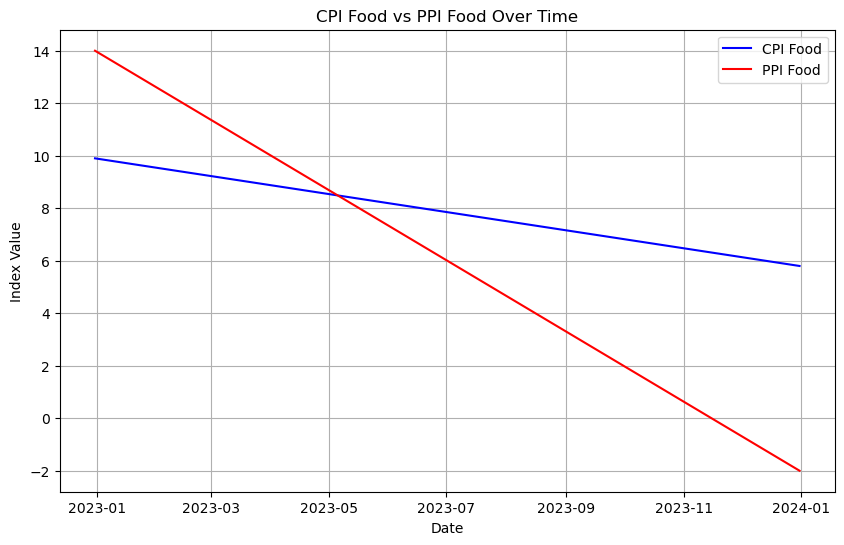

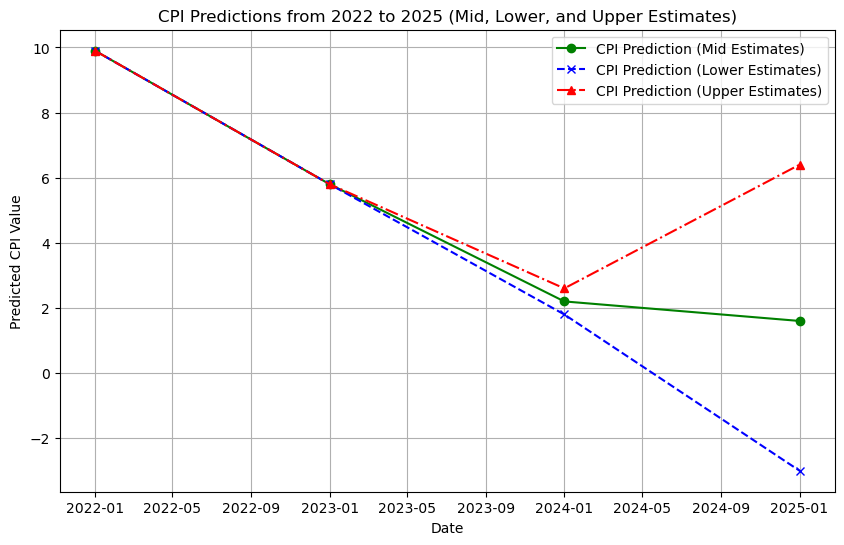

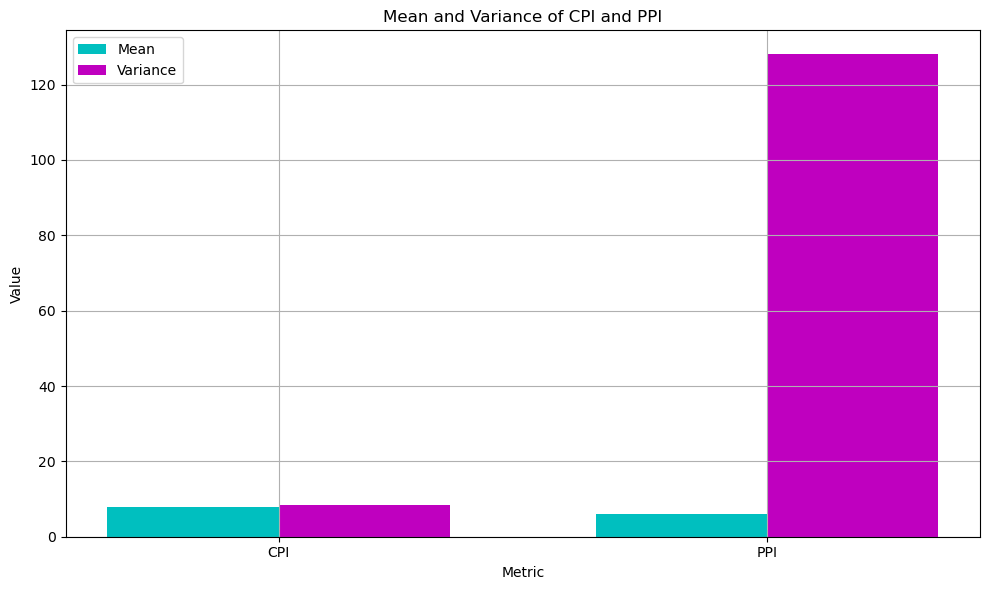


Conclusions and Discussion:
1. The CPI and PPI for food from 2022 to 2023 show variability, suggesting that changes in producer prices may have influenced consumer prices over time.
2. The CPI predictions for 2024 and 2025 include lower, mid, and upper estimates, providing a range of possible outcomes under different economic conditions. The lower estimates indicate a more conservative scenario, while the upper estimates indicate a more optimistic scenario.
3. The mean and variance comparison between CPI and PPI shows that CPI has a lower mean value compared to PPI, indicating relatively lower price levels on average. The variance of PPI is higher, suggesting that PPI is more volatile and subject to larger fluctuations compared to CPI.

Further Analysis Steps:
1. Conduct statistical correlation analysis between CPI and PPI to quantify the relationships between producer and consumer prices.
2. Develop predictive models incorporating both CPI and PPI to better forecast future trends in 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the provided CPI and PPI Excel files
cpi_file_path = "CPIForecast.xlsx"
ppi_file_path = "PPIForecast.xlsx"

cpi_data = pd.read_excel(cpi_file_path)
ppi_data = pd.read_excel(ppi_file_path, skiprows=4)

# Clean and process the CPI dataset
cpi_data.columns = [
    'Item', 'Relative Importance', 'Month_to_Month_Change',
    'Year_to_Year_Change', 'Year_to_Date_Change',
    'Annual_2022', 'Annual_2023', '20_Year_Avg',
    'Prediction_Lower_2024', 'Prediction_Mid_2024', 'Prediction_Upper_2024',
    'Prediction_Lower_2025', 'Prediction_Mid_2025', 'Prediction_Upper_2025'
]

# Filter data to only include rows related to 'All food' and drop unnecessary rows
cpi_food_data = cpi_data[cpi_data['Item'] == 'All food'].reset_index(drop=True)

# Create a new dataset for CPI analysis
cpi_values = cpi_food_data[['Annual_2022', 'Annual_2023']].dropna().values.flatten()
dates = pd.date_range(start='2022-01-01', periods=len(cpi_values), freq='Y')

# Create a DataFrame for CPI Food using the real data
food_price_df = pd.DataFrame({'Date': dates, 'CPI_Food': cpi_values})

# Clean and process the PPI dataset
ppi_data.columns = [
    'Item', 'Month_to_Month_Change', 'Year_to_Year_Change', 'Year_to_Date_Change',
    'Annual_2022', 'Annual_2023', '20_Year_Avg',
    'Prediction_Lower_2024', 'Prediction_Mid_2024', 'Prediction_Upper_2024',
    'Prediction_Lower_2025', 'Prediction_Mid_2025', 'Prediction_Upper_2025'
]

# Filter data to only include rows related to 'Processed foods and feeds'
ppi_food_data = ppi_data[ppi_data['Item'] == 'Processed foods and feeds'].reset_index(drop=True)

# Create a new dataset for PPI analysis
ppi_values = ppi_food_data.iloc[0, 4:6].dropna().values.flatten()

# Add PPI data to the existing CPI DataFrame
food_price_df['PPI_Food'] = ppi_values

# Display basic summary of the merged dataset
print("Merged Dataset Summary:")
print(food_price_df.describe())

# Create a graph to visualize CPI_Food and PPI_Food over time
plt.figure(figsize=(10, 6))
plt.plot(food_price_df['Date'], food_price_df['CPI_Food'], label='CPI Food', color='b')
plt.plot(food_price_df['Date'], food_price_df['PPI_Food'], label='PPI Food', color='r')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('CPI Food vs PPI Food Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Create a graph to visualize CPI predictions from 2022 to 2025 (Mid, Lower, and Upper estimates)
prediction_dates = pd.to_datetime(['2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01'])

# Mid estimates
mid_prediction_values = np.concatenate([cpi_food_data[['Annual_2022', 'Annual_2023']].values.flatten(), cpi_food_data[['Prediction_Mid_2024', 'Prediction_Mid_2025']].values.flatten()])
plt.figure(figsize=(10, 6))
plt.plot(prediction_dates, mid_prediction_values, label='CPI Prediction (Mid Estimates)', color='g', marker='o')

# Lower estimates
lower_prediction_values = np.concatenate([cpi_food_data[['Annual_2022', 'Annual_2023']].values.flatten(), cpi_food_data[['Prediction_Lower_2024', 'Prediction_Lower_2025']].values.flatten()])
plt.plot(prediction_dates, lower_prediction_values, label='CPI Prediction (Lower Estimates)', color='b', linestyle='--', marker='x')

# Upper estimates
upper_prediction_values = np.concatenate([cpi_food_data[['Annual_2022', 'Annual_2023']].values.flatten(), cpi_food_data[['Prediction_Upper_2024', 'Prediction_Upper_2025']].values.flatten()])
plt.plot(prediction_dates, upper_prediction_values, label='CPI Prediction (Upper Estimates)', color='r', linestyle='-.', marker='^')

plt.xlabel('Date')
plt.ylabel('Predicted CPI Value')
plt.title('CPI Predictions from 2022 to 2025 (Mid, Lower, and Upper Estimates)')
plt.legend()
plt.grid(True)
plt.show()

# Create a bar chart to compare the mean and variance of CPI and PPI
cpi_mean = food_price_df['CPI_Food'].mean()
ppi_mean = food_price_df['PPI_Food'].mean()
cpi_variance = food_price_df['CPI_Food'].var()
ppi_variance = food_price_df['PPI_Food'].var()

labels = ['CPI', 'PPI']
means = [cpi_mean, ppi_mean]
variances = [cpi_variance, ppi_variance]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, means, width, label='Mean', color='c')
rects2 = ax.bar(x + width/2, variances, width, label='Variance', color='m')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.set_title('Mean and Variance of CPI and PPI')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.grid(True)
plt.show()

# Conclusions and Discussion
print("\nConclusions and Discussion:")
print("1. The CPI and PPI for food from 2022 to 2023 show variability, suggesting that changes in producer prices may have influenced consumer prices over time.")
print("2. The CPI predictions for 2024 and 2025 include lower, mid, and upper estimates, providing a range of possible outcomes under different economic conditions. The lower estimates indicate a more conservative scenario, while the upper estimates indicate a more optimistic scenario.")
print("3. The mean and variance comparison between CPI and PPI shows that CPI has a lower mean value compared to PPI, indicating relatively lower price levels on average. The variance of PPI is higher, suggesting that PPI is more volatile and subject to larger fluctuations compared to CPI.")

print("\nFurther Analysis Steps:")
print("1. Conduct statistical correlation analysis between CPI and PPI to quantify the relationships between producer and consumer prices.")
print("2. Develop predictive models incorporating both CPI and PPI to better forecast future trends in food prices.")
print("3. Analyze external factors such as global economic events and policy interventions to understand their impact on both CPI and PPI.")